<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/MozCon_GSC_Impressions_%7C_Data_Skeptic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Power Up Your Data Skeptic Skills!!!
[Make a copy of this notebook]


📄 **Pages:**
- What pages are ranking for the same keywords (cannibalization)
- What pages have dropped in performance?
- What pages have improved?
- What are the top page categories on your site?







---



---

###+Shoutout to [Masaki Okazawa](https://twitter.com/saksters) who built several of these sections for a @RankSense #RSTWittorial
[Catch the genius thread & Notebook here.](https://twitter.com/saksters/status/1364991835425406976?s=20)

*Modifications, additions, and errors by Britney Muller*




##Pull Website Data

- Connect GSC to GDS: Export the bottom Landing Page Query Report as CSV: 

https://datastudio.google.com/reporting/53fe5326-d1f7-41a4-8796-b6d65c1215e6

(May-vs-april-landing-pages.csv)

###Import Libraries

In [ ]:
import csv
import json
import requests
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.display import display

###Upload CSV


In [ ]:
from google.colab import files
upload = files.upload()

Saving GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (3).csv to GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (3).csv
Saving GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (4).csv to GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (4).csv
Saving GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (5).csv to GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (5).csv


###Name the Page CSV into a dataframe


In [ ]:
lp_query = pd.read_csv("GSC - Data Skeptic Dashboard for SEOs_Page 1_Table.csv")
lp_query.head()

,Landing Page,Query,Impressions,Δ,Url Clicks,Δ.1,URL CTR,Δ.2
0,https://shop.googlemerchandisestore.com/Google...,google kickball,1150,1041.0,750,676.0,0.652174,-0.026725
1,https://shop.googlemerchandisestore.com/Google...,chrome dino,107970,-49864.0,481,-1474.0,0.004455,-0.007931
2,https://shop.googlemerchandisestore.com/Google...,youtube merchandise,2635,229.0,437,47.0,0.165844,0.003750
3,https://shop.googlemerchandisestore.com/Google...,google t shirt,1884,206.0,352,48.0,0.186837,0.005668
4,https://shop.googlemerchandisestore.com/Google...,dino game,67570,-248375.0,347,-5597.0,0.005135,-0.013678


###Clean the Data
Clean the data up to make it easier for an analysis. This includes removing null values, renaming columns, and having the right data types. 

In [ ]:
# Rename columns to your preference
lp_query = lp_query.rename(columns={"Url Clicks":"URL Clicks","Δ": "Impressions Difference", "Δ.1": "URL Clicks Difference", "Δ.2":"URL CTR Difference", "Δ.3":"Average Position Difference"})

# Replace all null values in the data set with 0
lp_query = lp_query.fillna(0)
lp_query.isnull().sum()

# Cast columns as int64 data type
lp_query['Impressions Difference'] = lp_query['Impressions Difference'].astype('int64')
lp_query['URL Clicks Difference'] = lp_query['URL Clicks Difference'].astype('int64')

# Added a style to the Landing Page column so that we can see the full URL
lp_query.head().style.set_properties(subset=['Landing Page'], **{'width': '100px'})

##Add Category Column

In [ ]:
# Extracts string after the 4th forward slash and puts the value into a Category column. 
lp_query['Category']=lp_query['Landing Page'].str.extract(r'(?:.*?\/){4}([^\/?#]+)')

# Replaces all + and - in the extracted string with a space and makes it title case.
lp_query['Category']=lp_query['Category'].str.replace('+', ' ')
lp_query['Category']=lp_query['Category'].str.replace('-', ' ').str.title()
lp_query.head().style.set_properties(subset=['Landing Page'], **{'width': '100px'})

,Landing Page,Query,Impressions,Impressions Difference,URL Clicks,URL Clicks Difference,URL CTR,URL CTR Difference,Category
0,https://shop.googlemerchandisestore.com/Google+Redesign/Lifestyle/Fun/Google+Kick+Ball.axd,google kickball,1150,1041,750,676,0.652174,-0.026725,Lifestyle
1,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,chrome dino,107970,-49864,481,-1474,0.004455,-0.007931,Apparel
2,https://shop.googlemerchandisestore.com/Google+Redesign/Shop+by+Brand/YouTube,youtube merchandise,2635,229,437,47,0.165844,0.003750,Shop By Brand
3,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Mens/Mens+T+Shirts,google t shirt,1884,206,352,48,0.186837,0.005668,Apparel
4,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,dino game,67570,-248375,347,-5597,0.005135,-0.013678,Apparel


In [ ]:
# Creates new columns for the value of the previous period, given we only have the data 
# for the current period and the absolute change. 
lp_query['Impressions (Prior Period)'] = (lp_query['Impressions'] - lp_query['Impressions Difference'])
lp_query['Clicks (Prior Period)'] = (lp_query['URL Clicks'] - lp_query['URL Clicks Difference'])
lp_query['Site CTR (Prior Period)'] = (lp_query['URL CTR'] - lp_query['URL CTR Difference'])
lp_query.head()

,Landing Page,Query,Impressions,Impressions Difference,URL Clicks,URL Clicks Difference,URL CTR,URL CTR Difference,Category,Impressions (Prior Period),Clicks (Prior Period),Site CTR (Prior Period)
0,https://shop.googlemerchandisestore.com/Google...,google kickball,1150,1041,750,676,0.652174,-0.026725,Lifestyle,109,74,0.678899
1,https://shop.googlemerchandisestore.com/Google...,chrome dino,107970,-49864,481,-1474,0.004455,-0.007931,Apparel,157834,1955,0.012386
2,https://shop.googlemerchandisestore.com/Google...,youtube merchandise,2635,229,437,47,0.165844,0.003750,Shop By Brand,2406,390,0.162095
3,https://shop.googlemerchandisestore.com/Google...,google t shirt,1884,206,352,48,0.186837,0.005668,Apparel,1678,304,0.181168
4,https://shop.googlemerchandisestore.com/Google...,dino game,67570,-248375,347,-5597,0.005135,-0.013678,Apparel,315945,5944,0.018813


In [ ]:
# Creates 2 new dataframes, one for brand queries and one for non-brand queries.
lp_query_brand = lp_query[lp_query['Query'].str.contains('google')]
lp_query_non_brand = lp_query[~lp_query['Query'].str.contains('google')]

##Top 10 Categories by Clicks

##### Total Site

In [ ]:
category_pivot = lp_query.pivot_table(index='Category', values=['URL Clicks'], aggfunc={'URL Clicks': np.sum})
category_pivot = category_pivot.sort_values(by='URL Clicks', ascending=False)
category_pivot.head(10)

,URL Clicks
Category,
Apparel,5062
Shop By Brand,2666
Accessories,1060
Lifestyle,993
Stationery,494
Bags,316
Drinkware,273
Clearance,136
Office,89


Text(0.5, 1.0, 'Top 10 URL Clicks by Category')

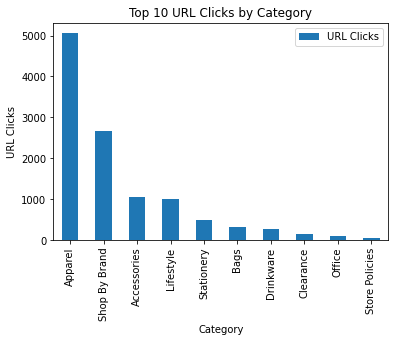

In [ ]:
ax_category = category_pivot.head(10).plot(kind='bar')
ax_category.set_ylabel('URL Clicks')
ax_category.set_title('Top 10 URL Clicks by Category')

In [ ]:
#Evaluate which Categories are correlated highest (and least high) with Clicks:
lp_query = lp_query.iloc[:,:6]
correlation_mat = lp_query.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
#Optional: To unload the filterable table
%unload_ext google.colab.data_table


##### Brand Queries

In [ ]:
brand_category_pivot = lp_query_brand.pivot_table(index='Category', values=['URL Clicks'], aggfunc={'URL Clicks': np.sum})
brand_category_pivot = brand_category_pivot.sort_values(by='URL Clicks', ascending=False)
brand_category_pivot.head(10)


,URL Clicks
Category,
Apparel,3015
Lifestyle,978
Accessories,525
Stationery,420
Bags,294
Drinkware,258
Shop By Brand,228
Clearance,133
Office,73


Text(0.5, 1.0, 'Top 10 Brand URL Clicks by Category')

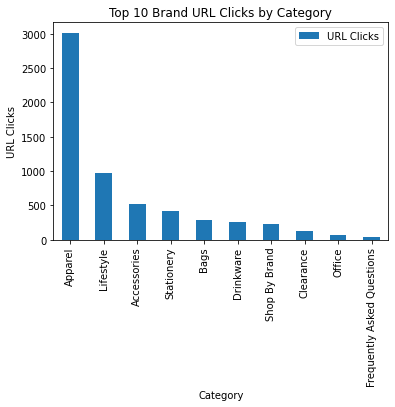

In [ ]:
ax_category = brand_category_pivot.head(10).plot(kind='bar')
ax_category.set_ylabel('URL Clicks')
ax_category.set_title('Top 10 Brand URL Clicks by Category')

##### Non-Brand Queries

In [ ]:
non_brand_category_pivot = lp_query_non_brand.pivot_table(index='Category', values=['URL Clicks'], aggfunc={'URL Clicks': np.sum})
non_brand_category_pivot = non_brand_category_pivot.sort_values(by='URL Clicks', ascending=False)
non_brand_category_pivot.head(10)

,URL Clicks
Category,
Shop By Brand,2438
Apparel,2047
Accessories,535
Stationery,74
Super G Unisex Joggers,45
Store Policies,44
Bags,22
Shipping Information,17
Office,16


Text(0.5, 1.0, 'Top 10 Non-Brand URL Clicks by Category')

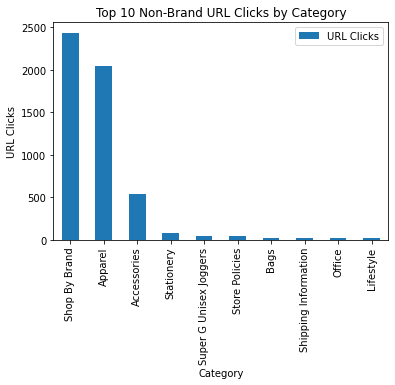

In [ ]:
ax_category = non_brand_category_pivot.head(10).plot(kind='bar')
ax_category.set_ylabel('URL Clicks')
ax_category.set_title('Top 10 Non-Brand URL Clicks by Category')

##Keyword Cannibalization

In [ ]:
brand_keyword_cannibalization_pivot = lp_query_brand.pivot_table(index='Query', values=['Landing Page','URL Clicks'], aggfunc={'Landing Page': 'count', 'URL Clicks': np.sum})
brand_keyword_cannibalization_pivot = brand_keyword_cannibalization_pivot.sort_values(by='Landing Page', ascending=False)
brand_keyword_cannibalization_pivot.head(10)

,Landing Page,URL Clicks
Query,,
site:shop.googlemerchandisestore.com,119,0
google merchandise store,54,533
google merchandise,43,162
shop.googlemerchandisestore,41,10
if the google merchandise store,38,0
shop.googlemerchandisestore.com,33,0
google lanyard,30,0
google gift shop,29,2
google store mountain view,28,4


In [ ]:
non_brand_keyword_cannibalization_pivot = lp_query_non_brand.pivot_table(index={'Query'}, values=['Landing Page','URL Clicks'], aggfunc={'Landing Page':'count', 'URL Clicks': np.sum})
non_brand_keyword_cannibalization_pivot = non_brand_keyword_cannibalization_pivot.sort_values(by='Landing Page', ascending=False)
non_brand_keyword_cannibalization_pivot.head(10)

,Landing Page,URL Clicks
Query,,
merchandise store,38,1
merchandise shop,37,1
buy merchandise,31,0
merchandise,30,4
merchandise.com,29,0
home merchandise,28,0
store merchandise,28,0
twitter merchandise store,26,0
go merchandise,26,0


##Breakout Queries

In [ ]:
lp_query_grouped[lp_query_grouped['Clicks (Prior Period)'] == 0].head(50)


,Impressions,Impressions Difference,URL Clicks,URL Clicks Difference,URL CTR,URL CTR Difference,Impressions (Prior Period),Clicks (Prior Period),Site CTR (Prior Period)
Query,,,,,,,,,
google t シャツ,57.0,22.0,6.000000,6.000000,0.105263,0.105263,35.0,0.0,0.0
tshirt store,628.0,160.0,5.000000,5.000000,0.007962,0.007962,468.0,0.0,0.0
google pixel shipping speed,28.0,18.0,5.000000,5.000000,0.178571,0.178571,10.0,0.0,0.0
google printed t shirts,33.0,14.0,4.000000,4.000000,0.121212,0.121212,19.0,0.0,0.0
google fi phone shipping time,18.0,-9.0,4.000000,4.000000,0.222222,0.222222,27.0,0.0,0.0
google certification,2368.0,992.0,4.000000,4.000000,0.001689,0.001689,1376.0,0.0,0.0
youtube play store,1277.0,1231.0,4.000000,4.000000,0.003132,0.003132,46.0,0.0,0.0
google returns,284.0,-6.0,3.000000,3.000000,0.010563,0.010563,290.0,0.0,0.0
stickers shop,226.0,84.0,3.000000,3.000000,0.013274,0.013274,142.0,0.0,0.0
